In [1]:
from os.path import join
from os import listdir, makedirs
import pandas as pd
from json import load
from stepmix import StepMix
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sys import path
path.insert(0, '..')
from utils import format_decision_tree_plot

In [2]:
onet_skills = pd.read_csv(join('..', 'onet_skills_unstacked.csv'), index_col=['O*NET-SOC Code', 'Title'])

In [3]:
SAVE_FIGURES = True
PRINT_OUTPUT = True
SEED = 42
GROUP_SKILL_MAPPING_PATH = 'option3.json'
OUTPUT_PATH = 'outputs_option3'

In [4]:
try:
    listdir(OUTPUT_PATH)
except FileNotFoundError:
    makedirs(OUTPUT_PATH)

In [5]:
with open(GROUP_SKILL_MAPPING_PATH) as file:
    group_skill_mapping = load(file)

In [6]:
for group, skills in group_skill_mapping.items():
    onet_skills[group] = onet_skills[skills].astype('float').mean(axis=1)

onet_skills = onet_skills[group_skill_mapping.keys()]

# Finding Ideal Number of Components In Mixture Model

In [7]:
aic = []
bic = []
range_components_trying = range(2, 20)
for i in range_components_trying:
    gmm = StepMix(
        n_components = i,
        measurement = 'continuous',
        init_params = 'random',
        random_state = SEED,
        progress_bar = 1 if PRINT_OUTPUT else 0
    ).fit(
        X=onet_skills.values
    )
    aic.append(gmm.aic(onet_skills.values))
    bic.append(gmm.bic(onet_skills.values))

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 147.10it/s, max_LL=-1.07e+4, max_avg_LL=-12.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 96.19it/s, max_LL=-8.91e+3, max_avg_LL=-10.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 53.73it/s, max_LL=-7.93e+3, max_avg_LL=-9.08]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 34.52it/s, max_LL=-7.27e+3, max_avg_LL=-8.33]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 51.79it/s, max_LL=-6.89e+3, max_avg_LL=-7.89]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 67.23it/s, max_LL=-6.43e+3, max_avg_LL=-7.37]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 27.21it/s, max_LL=-6.1e+3, max_avg_LL=-6.99]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 23.09it/s, max_LL=-5.9e+3, max_avg_LL=-6.76]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 45.82it/s, max_LL=-5.75e+3, max_avg_LL=-6.59]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 30.22it/s, max_LL=-5.45e+3, max_avg_LL=-6.25]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.82it/s, max_LL=-5.22e+3, max_avg_LL=-5.98]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 29.53it/s, max_LL=-5.2e+3, max_avg_LL=-5.96]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.55it/s, max_LL=-5.02e+3, max_avg_LL=-5.75]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 13.74it/s, max_LL=-4.96e+3, max_avg_LL=-5.68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 29.24it/s, max_LL=-4.68e+3, max_avg_LL=-5.36]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.27it/s, max_LL=-4.45e+3, max_avg_LL=-5.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 24.75it/s, max_LL=-4.57e+3, max_avg_LL=-5.24]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.92it/s, max_LL=-4.52e+3, max_avg_LL=-5.18]


/var/folders/nc/4202mlvd4hg61x79bmx7rfg00000gn/T/ipykernel_2561/465750531.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


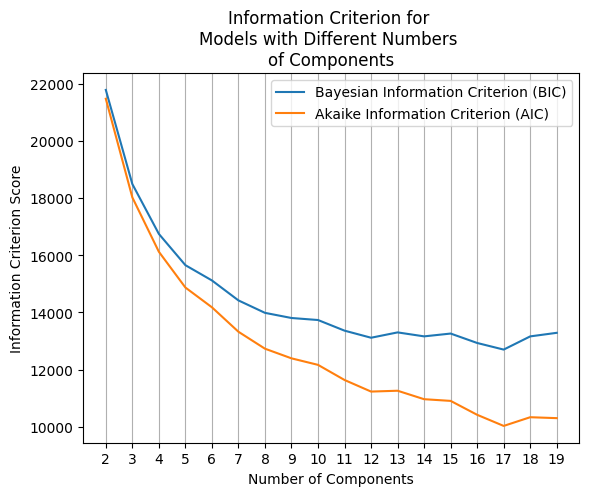

In [8]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xticks(ticks = range(len(range_components_trying)), labels = range_components_trying)
axes.grid(visible=True, axis='x')
axes.set_ylabel('Information Criterion Score')
axes.set_xlabel('Number of Components')
axes.set_title('Information Criterion for \nModels with Different Numbers \nof Components')

axes.plot(bic)
axes.plot(aic)
axes.legend(['Bayesian Information Criterion (BIC)', 'Akaike Information Criterion (AIC)'])

if SAVE_FIGURES:
    figure.savefig(join(OUTPUT_PATH, 'latent_profile_analysis.png'))
if PRINT_OUTPUT:
    figure.show()
else:
    plt.close(figure)

The graphs seem to indicate that a model with <i>4-6 components</i> would be both relatively well-performing and still parsimonious.

In [27]:
NUM_CLUSTERS = 7 # <-- Choose here.

# Fitting and Assessing Models

In [28]:
model = StepMix(
    n_components = NUM_CLUSTERS,
    measurement = 'continuous',
    init_params = 'random',
    random_state = SEED,
    progress_bar = 1 if PRINT_OUTPUT else 0
).fit(
    X=onet_skills.values
)

assignments = model.predict(onet_skills.values)
assignments_probabilities = np.apply_along_axis(
    max, 
    arr=model.predict_proba(onet_skills.values), 
    axis=1
)
onet_skills['Cluster'] = assignments
onet_skills['Cluster Probability'] = assignments_probabilities

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 37.72it/s, max_LL=1.59e+3, max_avg_LL=1.82]


## Displaying Cluster Assignments and Describing Clusters

In [29]:
if SAVE_FIGURES:
    excel_writer = pd.ExcelWriter(join(OUTPUT_PATH, f'latent_profile_analysis_{NUM_CLUSTERS}_clusters.xlsx'))

Displaying Cluster Assignments

In [30]:
assignments = onet_skills.reset_index().set_index('Cluster')[['Title', 'O*NET-SOC Code']].sort_index()

if PRINT_OUTPUT:
    display(assignments)
if SAVE_FIGURES:
    assignments.to_excel(excel_writer, 'Cluster Assignments')

,Title,O*NET-SOC Code
Cluster,,
0,Public Safety Telecommunicators,43-5031.00
0,Transit and Railroad Police,33-3052.00
0,Electricians,47-2111.00
0,Private Detectives and Investigators,33-9021.00
0,Gambling Surveillance Officers and Gambling In...,33-9031.00
...,...,...
6,Water and Wastewater Treatment Plant and Syste...,51-8031.00
6,Stationary Engineers and Boiler Operators,51-8021.00
6,Motorcycle Mechanics,49-3052.00


Displaying Cluster Skill Means

In [31]:
occupation_clusters_groupby = onet_skills.drop(columns='Cluster Probability').groupby(
    by=['Cluster']
)

mean = occupation_clusters_groupby.mean()
median = occupation_clusters_groupby.median()
std = occupation_clusters_groupby.std()
if PRINT_OUTPUT:
    display(mean)
    display(median)
    display(std)
if SAVE_FIGURES:
    mean.to_excel(excel_writer, 'Cluster Means')
    median.to_excel(excel_writer, 'Cluster Medians')
    std.to_excel(excel_writer, 'Cluster Standard Deviations')

,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Active Learning,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,3.077900,2.086863,2.979792,2.802683,1.325519,1.119367,3.702250,2.536700,3.747300,1.226600,3.574400,3.320950,3.158000,3.648450,2.849150,3.345250
1,2.641270,1.732698,2.400966,2.192646,1.958661,0.745000,2.978016,2.073492,2.927381,0.672540,2.850556,2.594206,2.503254,3.022381,2.207937,2.945873
2,3.993873,2.517948,3.377630,3.671464,0.898158,1.818671,4.275318,3.417919,4.767457,3.127052,4.319364,4.381272,4.185723,4.346416,3.690116,3.924855
3,2.238134,1.396474,2.092612,1.727338,1.653881,0.420174,2.645597,1.627985,2.437687,0.248060,2.433881,2.087836,2.057090,2.626866,1.829776,2.609925
4,3.350000,1.886000,2.854000,2.934667,1.349750,1.292667,3.700000,3.102000,3.926000,2.174000,3.552000,3.622000,3.474000,3.822000,2.898000,3.250000
5,3.649188,2.702266,3.410625,3.482583,1.034633,1.625146,4.005562,2.987375,4.125500,1.811062,3.989563,3.889063,3.756188,4.017188,3.380687,3.910000
6,2.940933,1.941233,2.651644,2.586889,2.327300,0.982533,3.059600,2.246400,3.097600,1.106667,2.990400,2.854800,2.983733,3.250267,2.655733,3.162267


,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Active Learning,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,3.000,2.00000,2.958333,2.876667,1.078125,1.000000,3.75,2.62,3.75,0.88,3.62,3.25,3.12,3.75,3.00,3.25
1,2.750,1.71875,2.354167,2.210000,2.218125,0.750000,3.00,2.12,2.88,0.62,2.88,2.62,2.50,3.00,2.12,3.00
2,4.000,2.47000,3.313333,3.626667,0.735000,1.620000,4.25,3.25,4.88,3.50,4.25,4.25,4.12,4.25,3.75,4.00
3,2.185,1.40500,2.093333,1.748333,1.758125,0.376667,2.75,1.75,2.38,0.12,2.38,2.12,2.12,2.75,2.00,2.62
4,3.750,1.68750,2.831667,3.373333,1.766250,0.753333,3.88,2.88,4.38,3.12,3.88,4.12,3.88,4.12,3.12,3.12
5,3.620,2.53250,3.439167,3.458333,0.812500,1.520000,4.00,3.00,4.12,1.75,4.00,4.00,3.88,4.00,3.25,3.88
6,3.000,1.93750,2.666667,2.503333,2.767500,0.960000,3.00,2.25,3.12,1.12,3.00,2.88,3.00,3.25,2.62,3.12


,Complex Problem Solving Skills,Resource Management Skills,Social Skills,Systems Skills,Tech-1,Tech-2,Active Listening,Mathematics,Reading Comprehension,Science,Speaking,Writing,Active Learning,Critical Thinking,Learning Strategies,Monitoring
Cluster,,,,,,,,,,,,,,,,
0,0.261633,0.476542,0.294162,0.321232,0.992498,0.599573,0.292442,0.652515,0.294058,1.118121,0.337656,0.359885,0.230296,0.257348,0.371985,0.319541
1,0.268095,0.279854,0.256230,0.251298,0.891874,0.391219,0.152578,0.508347,0.224981,0.615023,0.232965,0.283304,0.293710,0.167061,0.327779,0.201626
2,0.382648,0.596209,0.347869,0.387729,0.753733,0.793208,0.335664,0.947337,0.368872,1.368318,0.353241,0.414016,0.392285,0.332548,0.547236,0.335773
3,0.281855,0.269128,0.269654,0.324857,0.784330,0.256829,0.340829,0.591918,0.409331,0.346609,0.345340,0.395112,0.260537,0.307120,0.454479,0.330555
4,0.806815,0.298154,0.247509,0.869817,0.871270,1.228821,0.383667,1.184069,0.855792,1.574446,0.506281,0.755195,0.824973,0.417516,0.480697,0.367015
5,0.334848,0.608352,0.319076,0.310714,0.729895,0.669326,0.142161,0.595495,0.189637,1.240864,0.145647,0.203296,0.242258,0.133224,0.410147,0.322997
6,0.145854,0.323494,0.241617,0.242491,1.002264,0.355975,0.141807,0.553001,0.152598,0.634962,0.089570,0.130014,0.096629,0.202284,0.381898,0.215253


Displaying Cluster Representatives

In [32]:
top_k_highest_prob_occupations_each_cluster = onet_skills \
    .sort_values(
        by=['Cluster', 'Cluster Probability'],
        ascending=[True, False]
    ) \
    .groupby(
        by=['Cluster']
    ) \
    .nth[0:10] \
    .reset_index() \
    .set_index(['Cluster', 'O*NET-SOC Code', 'Title'])

if PRINT_OUTPUT:
    display(top_k_highest_prob_occupations_each_cluster)
if SAVE_FIGURES:
    top_k_highest_prob_occupations_each_cluster.to_excel(excel_writer, 'Cluster Representatives')

Complex Problem Solving Skills  \
Cluster O*NET-SOC Code Title                                                                                
0       11-9051.00     Food Service Managers                                                         3.00   
        11-9131.00     Postmasters and Mail Superintendents                                          3.12   
        11-9141.00     Property, Real Estate, and Community Associatio...                            3.12   
        11-9171.00     Funeral Home Managers                                                         3.00   
        13-1021.00     Buyers and Purchasing Agents, Farm Products                                   3.00   
...                                                                                                   ...   
6       51-9161.00     Computer Numerically Controlled Tool Operators                                3.00   
        49-9099.01     Geothermal Technicians                                                        2.88   
        49-9081.00     Wind Turbine Service Technicians                                              3.00   
        49-3042.00     Mobile Heavy Equipment Mechanics, Except Engines                              3.25   
        51-8092.00     Gas Plant Operators                                                           3.00   

                                                                           Resource Management Skills  \
Cluster O*NET-SOC Code Title                                                                            
0       11-9051.00     Food Service Managers                                                   3.3750   
        11-9131.00     Postmasters and Mail Superintendents                                    3.2200   
        11-9141.00     Property, Real Estate, and Community Associatio...                      3.1250   
        11-9171.00     Funeral Home Managers                                                   3.1550   
        13-1021.00     Buyers and Purchasing Agents, Farm Products                             3.0000   
...                                                                                               ...   
6       51-9161.00     Computer Numerically Controlled Tool Operators                          1.6900   
        49-9099.01     Geothermal Technicians                                                  2.0950   
        49-9081.00     Wind Turbine Service Technicians                                        2.1575   
        49-3042.00     Mobile Heavy Equipment Mechanics, Except Engines                        2.4075   
        51-8092.00     Gas Plant Operators                                                     2.0625   

                                                                           Social Skills  \
Cluster O*NET-SOC Code Title                                                               
0       11-9051.00     Food Service Managers                                    3.520000   
        11-9131.00     Postmasters and Mail Superintendents                     3.353333   
        11-9141.00     Property, Real Estate, and Community Associatio...       3.416667   
        11-9171.00     Funeral Home Managers                                    3.541667   
        13-1021.00     Buyers and Purchasing Agents, Farm Products              3.185000   
...                                                                                  ...   
6       51-9161.00     Computer Numerically Controlled Tool Operators           2.228333   
        49-9099.01     Geothermal Technicians                                   2.456667   
        49-9081.00     Wind Turbine Service Technicians                         2.438333   
        49-3042.00     Mobile Heavy Equipment Mechanics, Except Engines         2.685000   
        51-8092.00     Gas Plant Operators                                      2.685000   

                                                                           Systems Skills  \
C

In [33]:
if SAVE_FIGURES:
    excel_writer.close()

# Training Decision Tree on Assigned Clusters as an Attempted Explanation

In [34]:
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    random_state=SEED
).fit(
    X = onet_skills.drop(columns='Cluster'),
    y= onet_skills['Cluster']
)

/var/folders/nc/4202mlvd4hg61x79bmx7rfg00000gn/T/ipykernel_2561/1899221875.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


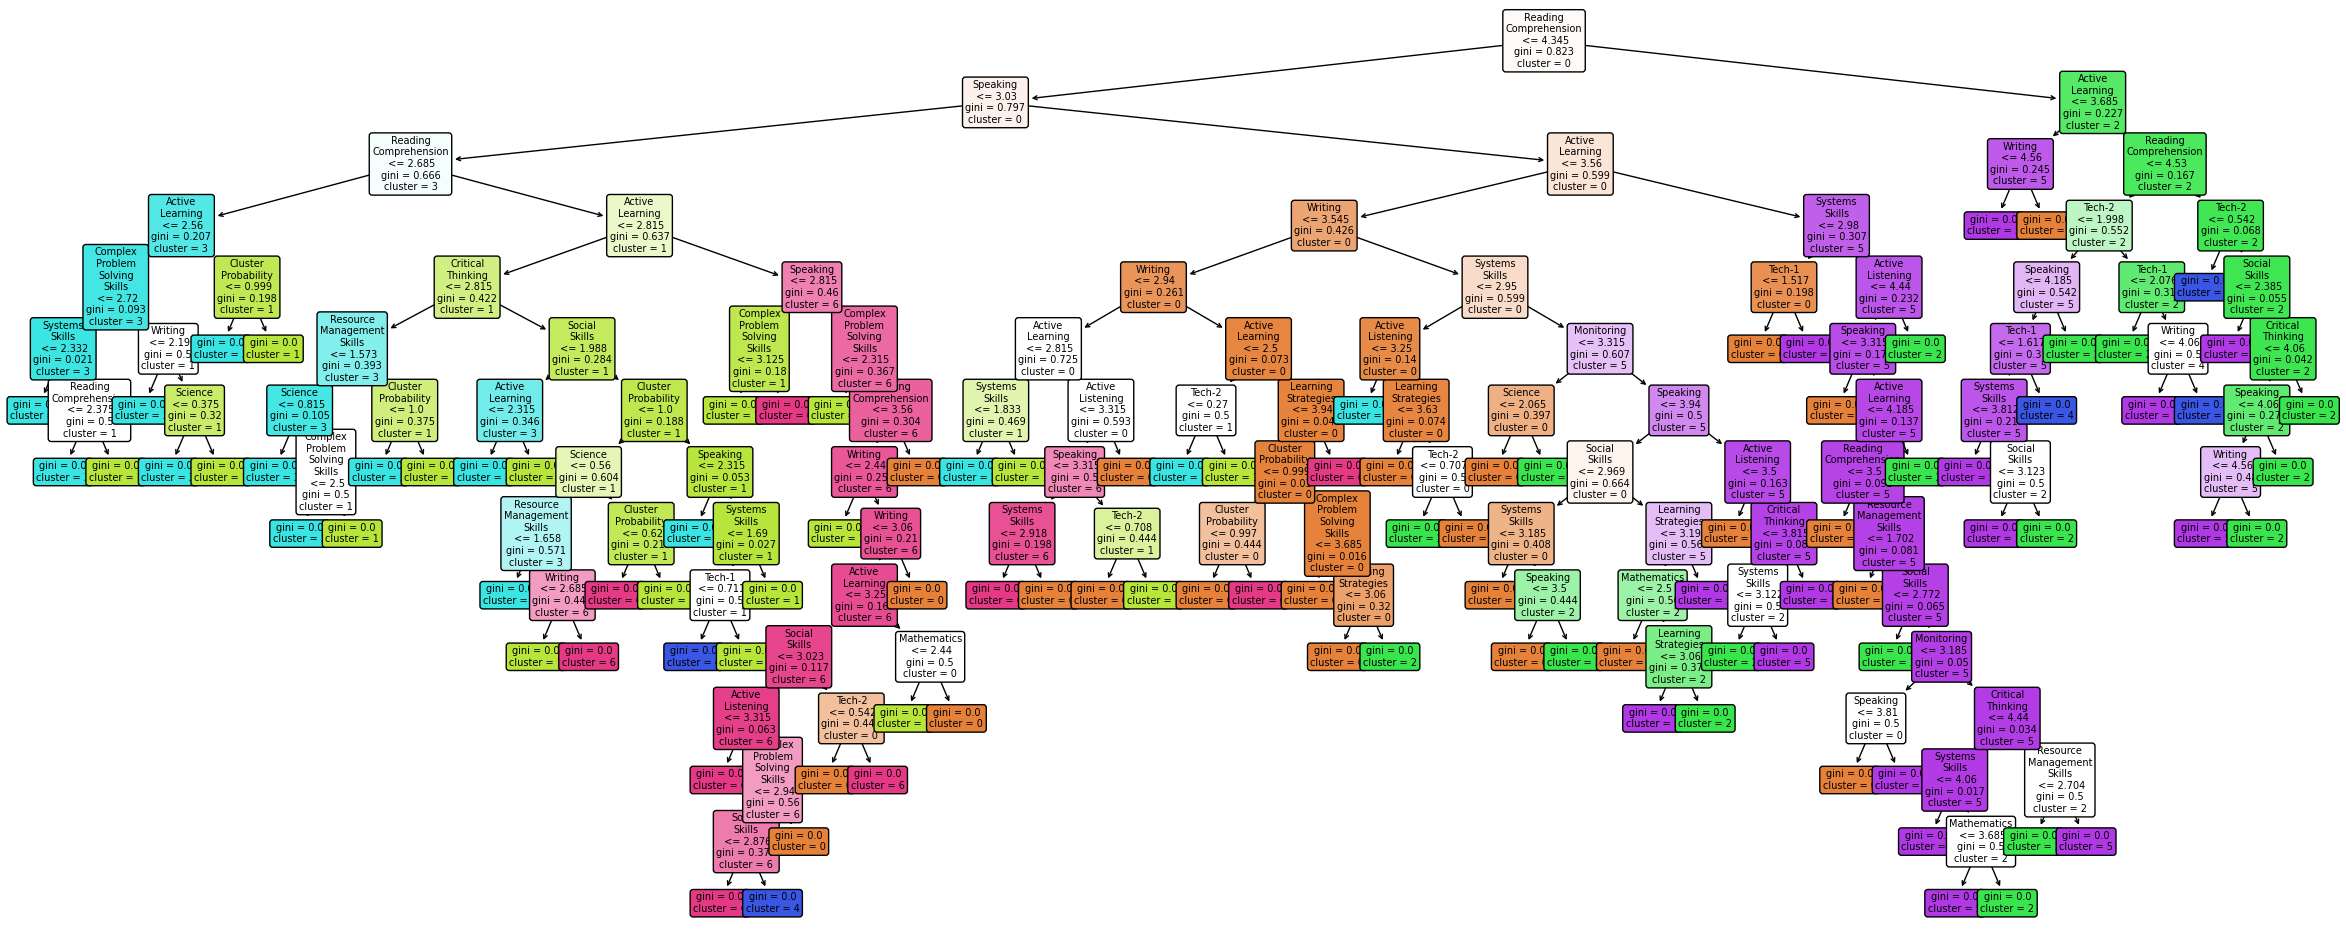

In [35]:
figure = plt.figure(figsize=(30, 12));
axes = figure.add_subplot(111);

plot_tree(
    decision_tree, 
    feature_names=onet_skills.drop(columns='Cluster').columns,
    impurity=True,
    fontsize=7, 
    rounded=True, 
    filled=True, 
    ax=axes
);

format_decision_tree_plot(axes)

if SAVE_FIGURES:
    figure.savefig(join(OUTPUT_PATH, f'latent_profile_analysis_decision_tree_{NUM_CLUSTERS}.png'))
if PRINT_OUTPUT:
    figure.show()
else:
    plt.close(figure)